<h1 style="text-decoration: underline; font-weight: bold; color: Orchid; font-size:48px;text-align:center;">
    Air Quality
</h1>

# <h2 style="text-decoration:underline; font-weight:bold; color: Thistle; text-align:center;">Data Information</h2>

 **The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2)  and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value.**

 **this dataset was taking from UC Irvine Machine Learning Repository**

<h2 style="text-decoration:underline; font-weight:bold; color: Thistle; text-align:center;">Features Information</h2>

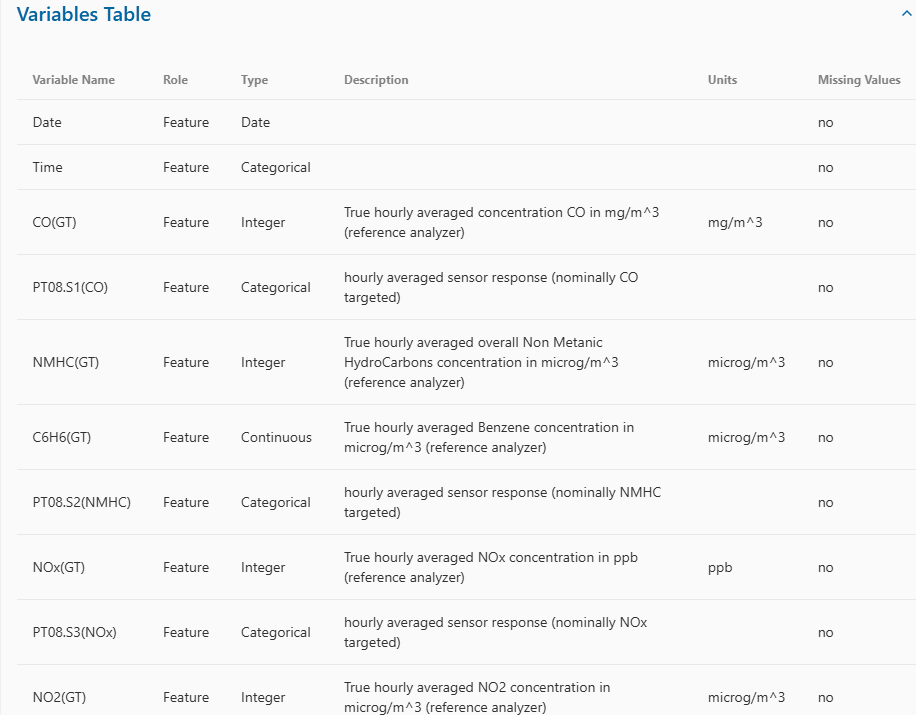
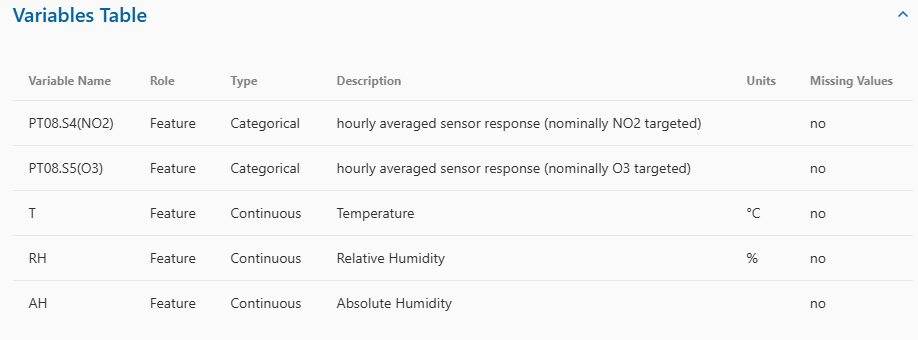

# <h2 style="text-decoration:underline; font-weight:bold; color: Thistle; text-align:center;">Exploratory Data Analysis</h2>

In [511]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats

from sklearn.preprocessing import PowerTransformer
from sklearn.impute import SimpleImputer

In [512]:
#importing the dataset
df= pd.read_csv('AirQualityUCI.csv', sep=';') #sep=; indicates the value are separated by ; instead of ,
df.head() #displays first 5 rows of dataset

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [513]:
# shape of data
print("the shape of data is: \n", df.shape)

# infor of data
print("The info is: \n", df.info()) # -> data-types + null values

# summary statistics
print("The summary stats of data is as follows:\n", df.describe(include='all'))

# the summary stats shows 9357 non-null values, so there are some null values in the dataset
# There may be potential outliers ince 25% data is < 700 and max value is 2523
# Their might be some numbers stored as strings

the shape of data is: 
 (9471, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), o

In [514]:
# checking for null values
df.isnull().sum()


# as we can see there are multiple null values in the dataset: 
# we will replace them with mean,median,mode.
# the last two un-named columns are completely empty, we will drop them


Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

In [515]:
# checking for duplicates
print("Total duplicated rows are: ", df.duplicated().sum()) # total duplicated rows
print("The duplicated rows are: ", df[df.duplicated()]) # displays duplicated rows

Total duplicated rows are:  113
The duplicated rows are:       Date Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
9358  NaN  NaN    NaN          NaN       NaN      NaN            NaN      NaN   
9359  NaN  NaN    NaN          NaN       NaN      NaN            NaN      NaN   
9360  NaN  NaN    NaN          NaN       NaN      NaN            NaN      NaN   
9361  NaN  NaN    NaN          NaN       NaN      NaN            NaN      NaN   
9362  NaN  NaN    NaN          NaN       NaN      NaN            NaN      NaN   
...   ...  ...    ...          ...       ...      ...            ...      ...   
9466  NaN  NaN    NaN          NaN       NaN      NaN            NaN      NaN   
9467  NaN  NaN    NaN          NaN       NaN      NaN            NaN      NaN   
9468  NaN  NaN    NaN          NaN       NaN      NaN            NaN      NaN   
9469  NaN  NaN    NaN          NaN       NaN      NaN            NaN      NaN   
9470  NaN  NaN    NaN          NaN       NaN      N

In [516]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [517]:
column_name  = df.columns
print("The columnn names are: \n", column_name) # displays column names

The columnn names are: 
 Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')


In [518]:
# check for categorical dirtiness | inconsistent categories
for col in df.select_dtypes(include='object').columns:
    print(f"Unique values in column {col} are: {df[col].unique()}")

# this shows that CO(GT), C6H6(GT), T, RH, AH columns have numbers stored as strings

Unique values in column Date are: ['10/03/2004' '11/03/2004' '12/03/2004' '13/03/2004' '14/03/2004'
 '15/03/2004' '16/03/2004' '17/03/2004' '18/03/2004' '19/03/2004'
 '20/03/2004' '21/03/2004' '22/03/2004' '23/03/2004' '24/03/2004'
 '25/03/2004' '26/03/2004' '27/03/2004' '28/03/2004' '29/03/2004'
 '30/03/2004' '31/03/2004' '01/04/2004' '02/04/2004' '03/04/2004'
 '04/04/2004' '05/04/2004' '06/04/2004' '07/04/2004' '08/04/2004'
 '09/04/2004' '10/04/2004' '11/04/2004' '12/04/2004' '13/04/2004'
 '14/04/2004' '15/04/2004' '16/04/2004' '17/04/2004' '18/04/2004'
 '19/04/2004' '20/04/2004' '21/04/2004' '22/04/2004' '23/04/2004'
 '24/04/2004' '25/04/2004' '26/04/2004' '27/04/2004' '28/04/2004'
 '29/04/2004' '30/04/2004' '01/05/2004' '02/05/2004' '03/05/2004'
 '04/05/2004' '05/05/2004' '06/05/2004' '07/05/2004' '08/05/2004'
 '09/05/2004' '10/05/2004' '11/05/2004' '12/05/2004' '13/05/2004'
 '14/05/2004' '15/05/2004' '16/05/2004' '17/05/2004' '18/05/2004'
 '19/05/2004' '20/05/2004' '21/05/2004' '2

In [519]:
for col in df.select_dtypes(include="object").columns:
    try:
        df[col].astype(float)
        print(f" {col} looks numeric but stored as object.")
    except:
        print(f" {col} is non-numeric text.")

# i wrote this snippet to make sure that the columns are numeric but it's output suggest otherwise
# this is because it has Nan values and empty spaces which is biasing the result.


 Date is non-numeric text.
 Time is non-numeric text.
 CO(GT) is non-numeric text.
 C6H6(GT) is non-numeric text.
 T is non-numeric text.
 RH is non-numeric text.
 AH is non-numeric text.


**Before furter moving into finding out more "what's wrong" with the dataset, like outliers, variance, relations. We have to remove null values, drop duplicates, shift object to numeric.**

In [520]:
df = df.replace(',', '.', regex=True)

# firstly converting object to numeric
for col in ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
# what numeric conversion did is that it converted all the junk/non numeric values to Nan
# which i can fill later with mean/median/mode

df.info() # now we can see that the columns have been converted to numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


In [521]:
# dropping duplicates
df.drop_duplicates(inplace=True)

#checking wether they exist or not
print("Total duplicated rows are: ", df.duplicated().sum()) # total duplicated rows

# we can see that dupliacted rows are 0

Total duplicated rows are:  0


In [522]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [523]:
df.replace(['', ' ', 'NA', -200], np.nan, inplace=True) 

df = df.fillna(df.median(numeric_only=True))
df.isnull().sum() # checking null values again

Date                1
Time                1
CO(GT)              0
PT08.S1(CO)         0
NMHC(GT)            0
C6H6(GT)            0
PT08.S2(NMHC)       0
NOx(GT)             0
PT08.S3(NOx)        0
NO2(GT)             0
PT08.S4(NO2)        0
PT08.S5(O3)         0
T                   0
RH                  0
AH                  0
Unnamed: 15      9358
Unnamed: 16      9358
dtype: int64

In [524]:
# dropping complete null columns
df = df.drop(columns=["Unnamed: 15", "Unnamed: 16"], errors="ignore")
print(df.columns.tolist())
# we can see that the un-named columns have been dropped


['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']


In [525]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [526]:
# checking variance
low_var = df.columns[df.nunique() <= 1] #If variance < 1 → the values are tightly packed, which often means low information content.
print("low variance columns are:", list[low_var])

# checking for skewness
print(df.skew(numeric_only=True))

low variance columns are: list[Index([], dtype='object')]
CO(GT)           1.629474
PT08.S1(CO)      0.790028
NMHC(GT)         6.895688
C6H6(GT)         1.413468
PT08.S2(NMHC)    0.585982
NOx(GT)          2.014746
PT08.S3(NOx)     1.136832
NO2(GT)          0.732319
PT08.S4(NO2)     0.207197
PT08.S5(O3)      0.657595
T                0.322572
RH              -0.041229
AH               0.265321
dtype: float64


**OUTLIERS CHECKING**

**1. using box plot**

**2. using IQ range**

**3. using histogram**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'CO(GT)'),
  Text(1, 0, 'PT08.S1(CO)'),
  Text(2, 0, 'NMHC(GT)'),
  Text(3, 0, 'C6H6(GT)'),
  Text(4, 0, 'PT08.S2(NMHC)'),
  Text(5, 0, 'NOx(GT)'),
  Text(6, 0, 'PT08.S3(NOx)'),
  Text(7, 0, 'NO2(GT)'),
  Text(8, 0, 'PT08.S4(NO2)'),
  Text(9, 0, 'PT08.S5(O3)'),
  Text(10, 0, 'T'),
  Text(11, 0, 'RH'),
  Text(12, 0, 'AH')])

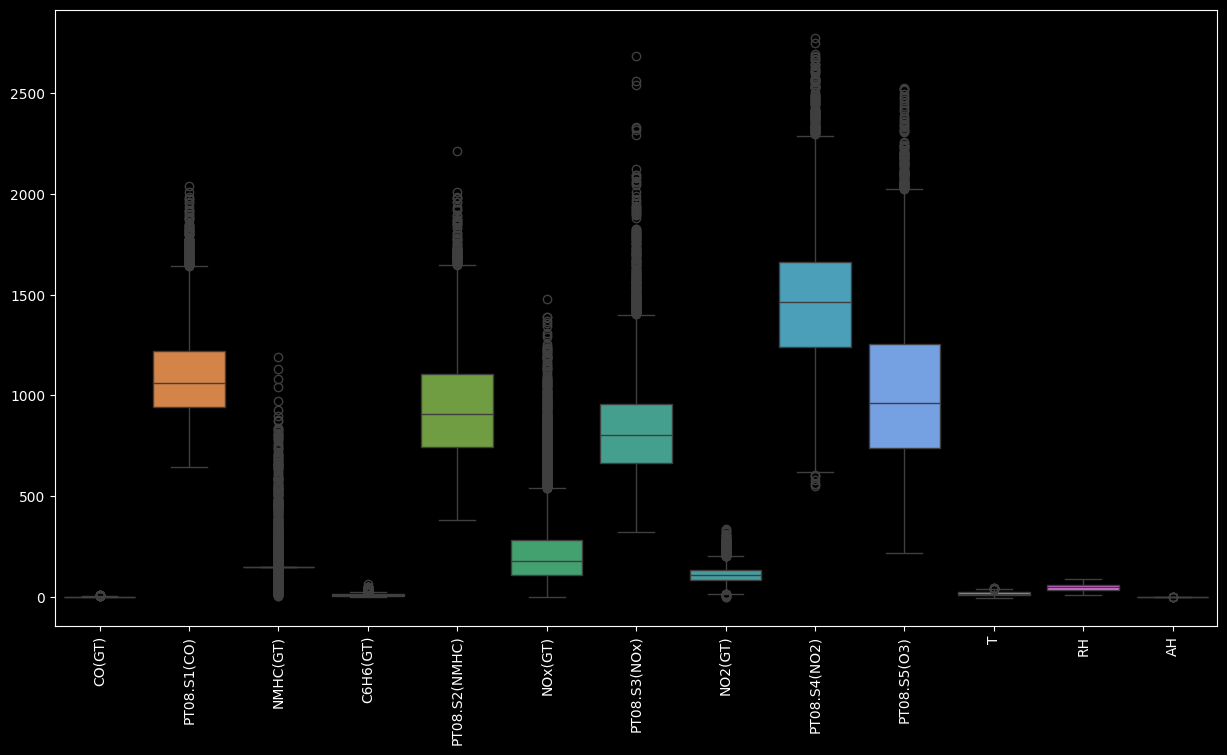

In [527]:
# BOX PLOT
plt.style.use('dark_background')

plt.figure(figsize=(15, 8))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.xticks(rotation=90)

# Key Observations:
**PT08.S5(O3) appears to have the highest reading (around 2500)**

**PT08.S1(CO) and PT08.S4(NO2) show moderate levels (around 1500-2000)**

**Reference measurements (those labeled "GT") generally show lower values than sensor readings**

**C5H6(GT) (Pentane) shows the lowest concentration (near 0)**

In [528]:
#print outliers for each column
for column in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers_count = ((df[column] < lower) | (df[column] > upper)).sum()
    print(f"{column}: {outliers_count} outliers")

CO(GT): 454 outliers
PT08.S1(CO): 145 outliers
NMHC(GT): 909 outliers
C6H6(GT): 286 outliers
PT08.S2(NMHC): 91 outliers
NOx(GT): 778 outliers
PT08.S3(NOx): 278 outliers
NO2(GT): 380 outliers
PT08.S4(NO2): 131 outliers
PT08.S5(O3): 131 outliers
T: 10 outliers
RH: 0 outliers
AH: 7 outliers


In [529]:
high_priority_cols = ['NMHC(GT)', 'NOx(GT)', 'CO(GT)', 'C6H6(GT)', 'PT08.S3(NOx)']

def iqr_capping(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[col] = np.clip(df[col], lower, upper)
    return df

# Cap outliers in high-priority columns
df = iqr_capping(df, high_priority_cols)

In [530]:
yeo_johnson = PowerTransformer(method='yeo-johnson')

for col in high_priority_cols:
    df[col] = yeo_johnson.fit_transform(df[[col]])  # Replace original
    print(f"Transformed {col}, new skew: {df[col].skew():.3f}")

Transformed NMHC(GT), new skew: 0.000
Transformed NOx(GT), new skew: -0.026
Transformed CO(GT), new skew: 0.000
Transformed C6H6(GT), new skew: -0.030
Transformed PT08.S3(NOx), new skew: -0.007


In [531]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,0.653136,1360.0,0.0,0.528046,1046.0,-0.141880,1.005428,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,0.159487,1292.0,0.0,0.182348,955.0,-0.744064,1.415568,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,0.334327,1402.0,0.0,0.121075,939.0,-0.450838,1.300670,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,0.334327,1376.0,0.0,0.151949,948.0,-0.093742,1.134030,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,-0.228567,1272.0,0.0,-0.313252,836.0,-0.450838,1.518185,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [532]:
#print outliers for each column
for column in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers_count = ((df[column] < lower) | (df[column] > upper)).sum()
    print(f"{column}: {outliers_count} outliers")

CO(GT): 0 outliers
PT08.S1(CO): 145 outliers
NMHC(GT): 0 outliers
C6H6(GT): 0 outliers
PT08.S2(NMHC): 91 outliers
NOx(GT): 21 outliers
PT08.S3(NOx): 21 outliers
NO2(GT): 380 outliers
PT08.S4(NO2): 131 outliers
PT08.S5(O3): 131 outliers
T: 10 outliers
RH: 0 outliers
AH: 7 outliers


**NO2(GT): 380 outliers - This might be real environmental variation**

**PT08.S4(NO2): 131 outliers - Sensor-specific patterns**

**PT08.S5(O3): 131 outliers - Ozone naturally has spikes**

**Others: Minimal outliers (7-21) - Essentially clean**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'CO(GT)'),
  Text(1, 0, 'PT08.S1(CO)'),
  Text(2, 0, 'NMHC(GT)'),
  Text(3, 0, 'C6H6(GT)'),
  Text(4, 0, 'PT08.S2(NMHC)'),
  Text(5, 0, 'NOx(GT)'),
  Text(6, 0, 'PT08.S3(NOx)'),
  Text(7, 0, 'NO2(GT)'),
  Text(8, 0, 'PT08.S4(NO2)'),
  Text(9, 0, 'PT08.S5(O3)'),
  Text(10, 0, 'T'),
  Text(11, 0, 'RH'),
  Text(12, 0, 'AH')])

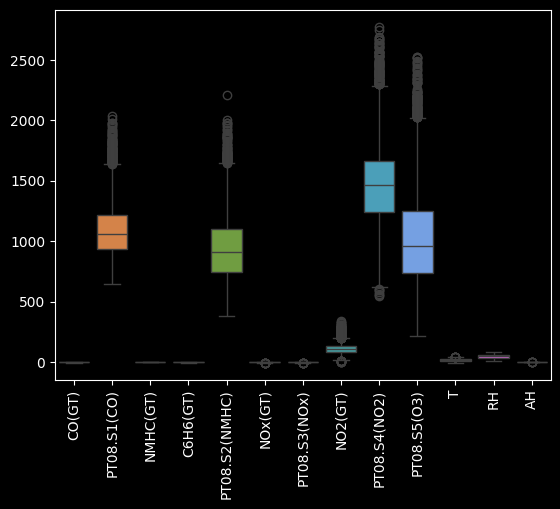

In [533]:
# checking outliers
# 1. using box plot
sns.boxplot(data=df.select_dtypes(include='number'))
plt.xticks(rotation=90)

# Analysis of the graph
1. Not that amount of extreme outliers → The preprocessing removed the “flying dots” above/below whiskers.

2. More symmetric distributions → The boxes are centered, meaning skewness has reduced.

3. Comparable scales across features → Before, NMHC(GT) and a few others were heavily stretched; now the distributions look more balanced.

In [534]:
df.isnull().sum() # checking null values again

Date             1
Time             1
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

array([[<Axes: title={'center': 'CO(GT)'}>,
        <Axes: title={'center': 'PT08.S1(CO)'}>,
        <Axes: title={'center': 'NMHC(GT)'}>,
        <Axes: title={'center': 'C6H6(GT)'}>],
       [<Axes: title={'center': 'PT08.S2(NMHC)'}>,
        <Axes: title={'center': 'NOx(GT)'}>,
        <Axes: title={'center': 'PT08.S3(NOx)'}>,
        <Axes: title={'center': 'NO2(GT)'}>],
       [<Axes: title={'center': 'PT08.S4(NO2)'}>,
        <Axes: title={'center': 'PT08.S5(O3)'}>,
        <Axes: title={'center': 'T'}>, <Axes: title={'center': 'RH'}>],
       [<Axes: title={'center': 'AH'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

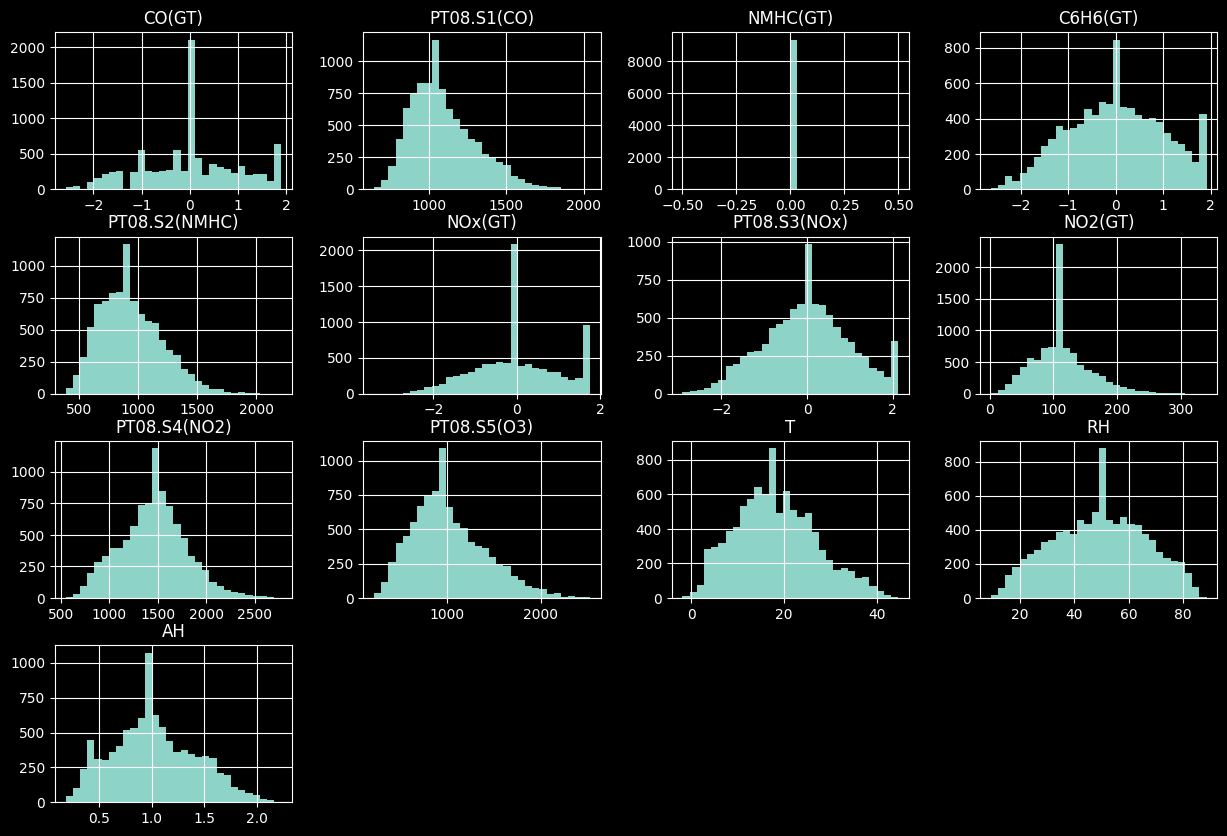

In [535]:
# applying histogram to check outliers and skewness for one last time
df.hist(figsize=(15,10), bins=30)


In [536]:
# since historgram are spiking at the middle, we will checkk value count at the spkies
print(df[column].value_counts().head(10))

# the result from above shows that -0.009365 in the AH column is spiking a lot, maybe not imputated properly.


# Apply transformation to reduce the spike effect
df['AH_log'] = np.log1p(df['AH'] - df['AH'].min() + 1)  # Shift to positive

print(df[column].value_counts().head(10))

AH
0.9954    368
0.8394      6
0.9684      6
0.7487      6
0.9722      6
1.1199      6
1.0594      5
0.9271      5
0.8736      5
0.8325      5
Name: count, dtype: int64
AH
0.9954    368
0.8394      6
0.9684      6
0.7487      6
0.9722      6
1.1199      6
1.0594      5
0.9271      5
0.8736      5
0.8325      5
Name: count, dtype: int64


Top AH values:
AH
0.9954    368
0.8394      6
0.9684      6
0.7487      6
0.9722      6
Name: count, dtype: int64

Dominant value: 0.9954
Count: 368
Are these null values? 0
Minimum AH: 0.1847
Maximum AH: 2.231


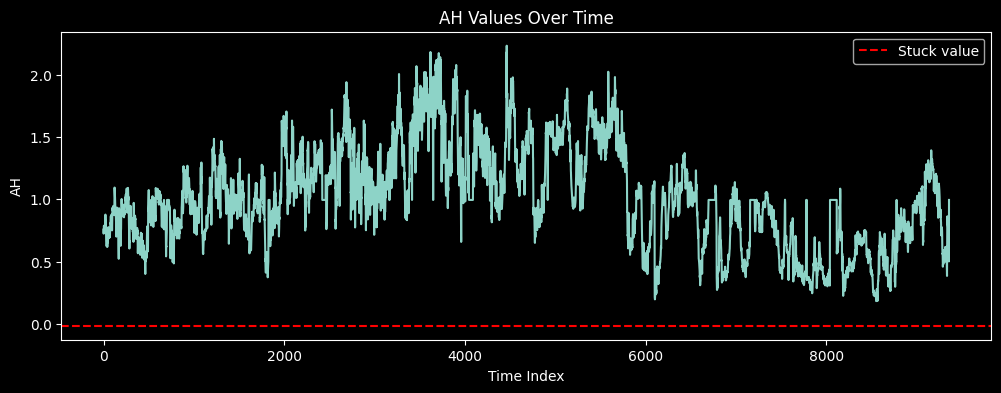

In [537]:
# Check what the original 372 identical values are
original_ah_values = df['AH'].value_counts()
print("Top AH values:")
print(original_ah_values.head())

# This will show you the exact value that appears 372 times
dominant_value = original_ah_values.index[0]
print(f"\nDominant value: {dominant_value}")
print(f"Count: {original_ah_values.iloc[0]}")

# Check if these are sensor errors, missing value codes, or valid measurements
print(f"Are these null values? {df['AH'].isnull().sum()}")
print(f"Minimum AH: {df['AH'].min()}")
print(f"Maximum AH: {df['AH'].max()}")

# Check if these values occur in one continuous block (sensor stuck)
# Or scattered throughout (different issue)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(df['AH'])
plt.axhline(y=-0.012465, color='r', linestyle='--', label='Stuck value')
plt.title('AH Values Over Time')
plt.ylabel('AH')
plt.xlabel('Time Index')
plt.legend()
plt.show()

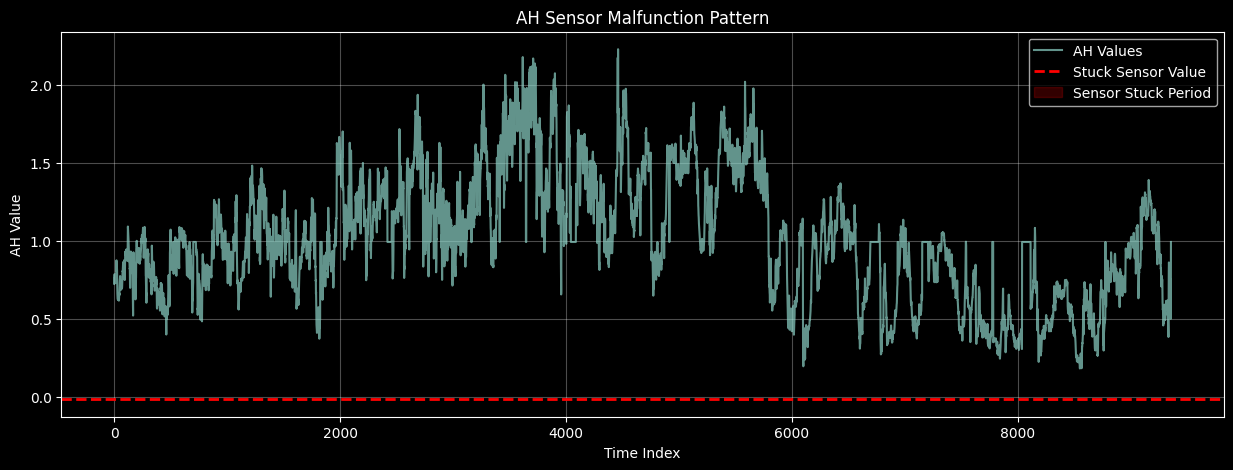

In [538]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(df['AH'], alpha=0.7, label='AH Values')
plt.axhline(y=-0.012465, color='red', linestyle='--', linewidth=2, label='Stuck Sensor Value')
plt.fill_betweenx(y=[df['AH'].min(), df['AH'].max()], 
                 x1=df[df['AH'] == -0.012465].index.min(), 
                 x2=df[df['AH'] == -0.012465].index.max(),
                 color='red', alpha=0.2, label='Sensor Stuck Period')
plt.title('AH Sensor Malfunction Pattern')
plt.ylabel('AH Value')
plt.xlabel('Time Index')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [539]:
# Check what other sensors were doing during the stuck period
stuck_indices = df[df['AH'] == -0.012465].index

print("Other sensor behavior during AH sensor failure:")
for col in ['T', 'RH', 'CO(GT)']:  # Check other key sensors
    if col in df.columns:
        stuck_period_stats = df.loc[stuck_indices, col].describe()
        print(f"\n{col} during stuck period:")
        print(stuck_period_stats)

Other sensor behavior during AH sensor failure:

T during stuck period:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: T, dtype: float64

RH during stuck period:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: RH, dtype: float64

CO(GT) during stuck period:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: CO(GT), dtype: float64


In [540]:
# Identify the stuck period (system outage)
stuck_mask = df['AH'] == --0.012465

# Remove these rows from the original DataFrame
df = df[~stuck_mask]

print(f"Removed {stuck_mask.sum()} records of system outage")
print(f"New DataFrame shape: {df.shape}")


# Check if the value still exists in your DataFrame
value_exists = (df['AH'] == -0.012465).any()
print(f"Value -0.012465 exists in AH: {value_exists}")

# Check all unique values around that range
print("Unique AH values near -0.012465:")
print(np.sort(df['AH'].unique())[:10])  # First 10 sorted values

# Check that the spike is gone from value counts
print("AH value counts (no more 372 identical values):")
print(df['AH'].value_counts().head(10))

# Check the distribution is now healthy
print("\nAH distribution after cleaning:")
print(df['AH'].describe())

Removed 0 records of system outage
New DataFrame shape: (9358, 16)
Value -0.012465 exists in AH: False
Unique AH values near -0.012465:
[0.1847 0.1862 0.191  0.1975 0.1988 0.2029 0.2031 0.2062 0.2086 0.2157]
AH value counts (no more 372 identical values):
AH
0.9954    368
0.8394      6
0.9684      6
0.7487      6
0.9722      6
1.1199      6
1.0594      5
0.9271      5
0.8736      5
0.8325      5
Name: count, dtype: int64

AH distribution after cleaning:
count    9358.000000
mean        1.024349
std         0.395857
min         0.184700
25%         0.746125
50%         0.995400
75%         1.296100
max         2.231000
Name: AH, dtype: float64


# This means the values are there but floating-point precision is causing the exact match to fail.

In [541]:
# Use tolerance for floating-point comparison
tolerance = 1e-6
stuck_mask = np.isclose(df['AH'], -0.012465, atol=tolerance)

print(f"Found {stuck_mask.sum()} stuck values using tolerance {tolerance}")

# Remove them from the DataFrame
df = df[~stuck_mask]
print(f"Removed {stuck_mask.sum()} records of system outage")
print(f"New DataFrame shape: {df.shape}")


# Check again with tolerance
stuck_mask_final = np.isclose(df['AH'], -0.012465, atol=tolerance)
print(f"Remaining stuck values after cleanup: {stuck_mask_final.sum()}")

# Check new value counts
print("\nAH value counts after final cleanup:")
print(df['AH'].value_counts().head(10))

Found 0 stuck values using tolerance 1e-06
Removed 0 records of system outage
New DataFrame shape: (9358, 16)
Remaining stuck values after cleanup: 0

AH value counts after final cleanup:
AH
0.9954    368
0.8394      6
0.9684      6
0.7487      6
0.9722      6
1.1199      6
1.0594      5
0.9271      5
0.8736      5
0.8325      5
Name: count, dtype: int64


In [542]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,AH_log
0,10/03/2004,18.00.00,0.653136,1360.0,0.0,0.528046,1046.0,-0.141880,1.005428,113.0,1692.0,1268.0,13.6,48.9,0.7578,0.945111
1,10/03/2004,19.00.00,0.159487,1292.0,0.0,0.182348,955.0,-0.744064,1.415568,92.0,1559.0,972.0,13.3,47.7,0.7255,0.932479
2,10/03/2004,20.00.00,0.334327,1402.0,0.0,0.121075,939.0,-0.450838,1.300670,114.0,1555.0,1074.0,11.9,54.0,0.7502,0.942153
3,10/03/2004,21.00.00,0.334327,1376.0,0.0,0.151949,948.0,-0.093742,1.134030,122.0,1584.0,1203.0,11.0,60.0,0.7867,0.956280
4,10/03/2004,22.00.00,-0.228567,1272.0,0.0,-0.313252,836.0,-0.450838,1.518185,116.0,1490.0,1110.0,11.2,59.6,0.7888,0.957087


array([[<Axes: title={'center': 'CO(GT)'}>,
        <Axes: title={'center': 'PT08.S1(CO)'}>,
        <Axes: title={'center': 'NMHC(GT)'}>,
        <Axes: title={'center': 'C6H6(GT)'}>],
       [<Axes: title={'center': 'PT08.S2(NMHC)'}>,
        <Axes: title={'center': 'NOx(GT)'}>,
        <Axes: title={'center': 'PT08.S3(NOx)'}>,
        <Axes: title={'center': 'NO2(GT)'}>],
       [<Axes: title={'center': 'PT08.S4(NO2)'}>,
        <Axes: title={'center': 'PT08.S5(O3)'}>,
        <Axes: title={'center': 'T'}>, <Axes: title={'center': 'RH'}>],
       [<Axes: title={'center': 'AH'}>,
        <Axes: title={'center': 'AH_log'}>, <Axes: >, <Axes: >]],
      dtype=object)

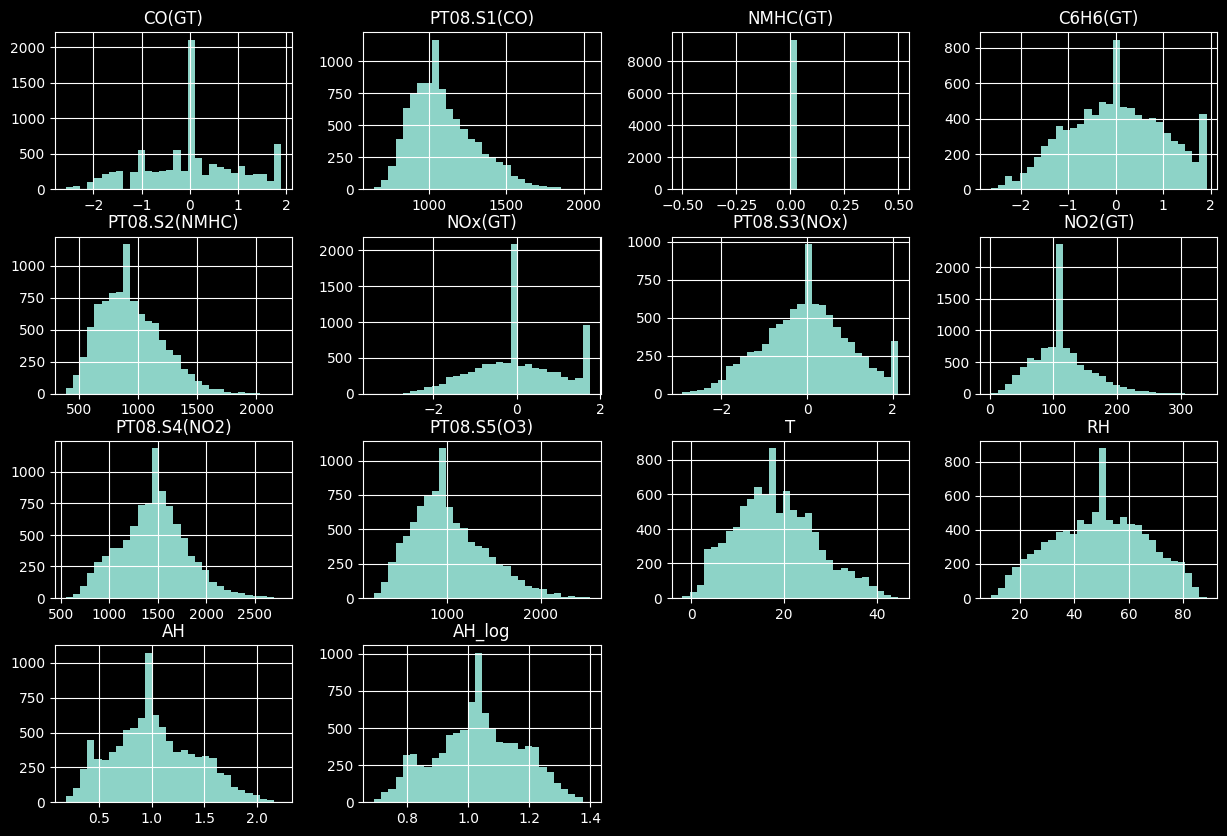

In [ ]:
# applying histogram to check outliers and skewness
df.hist(figsize=(15,10), bins=30)

In [544]:
#combining date and time column to make a new datetime column
df["Datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"], errors="coerce", dayfirst=True)
df = df.drop(columns=["Date", "Time"])  # drop old columns


# filling categorical values with forward fill method
df["Datetime"] = df["Datetime"].ffill() # it is useful in time series data


C:\Users\Laibaa\AppData\Local\Temp\ipykernel_7252\494029322.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"], errors="coerce", dayfirst=True)


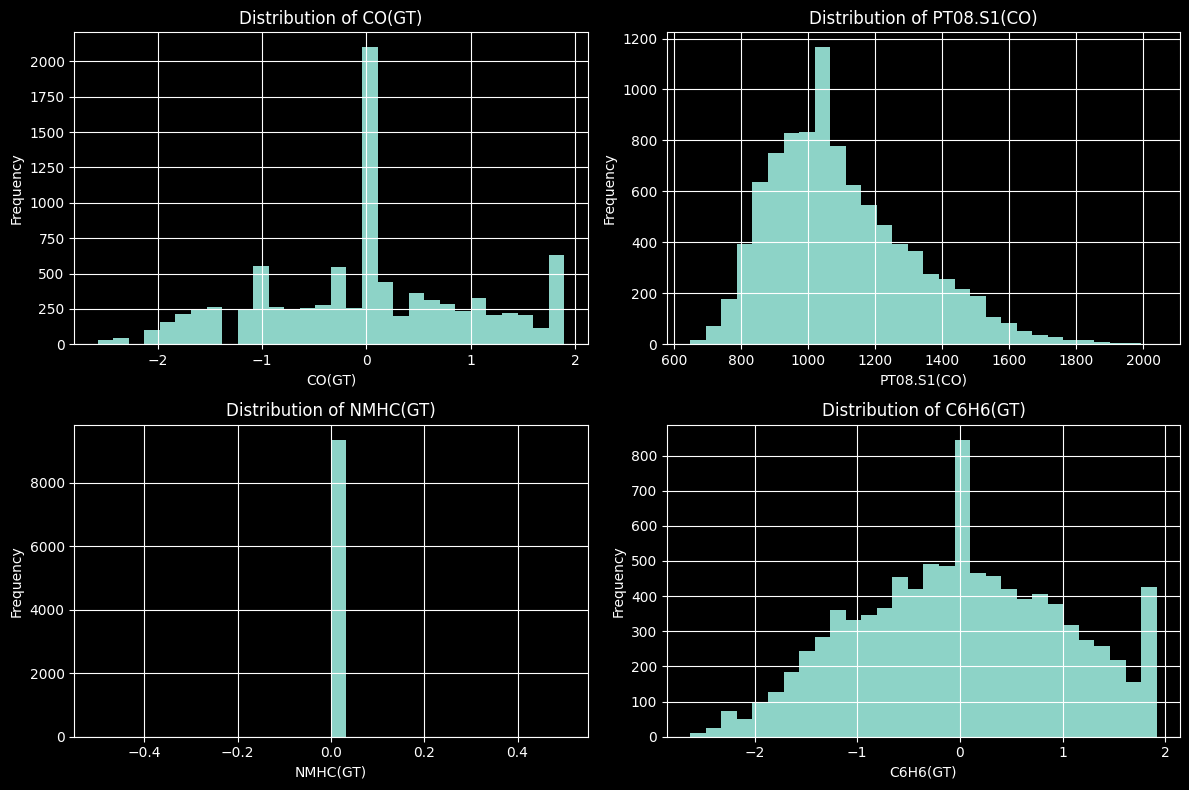

In [545]:
# Plot distributions for top 4 columns
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
numeric_cols = df.select_dtypes(include=[np.number]).columns[:4]

for i, col in enumerate(numeric_cols):
    ax = axes[i//2, i%2]
    df[col].hist(bins=30, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()



In [549]:
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,AH_log,Datetime
0,0.653136,1360.0,0.0,0.528046,1046.0,-0.141880,1.005428,113.0,1692.0,1268.0,13.6,48.9,0.7578,0.945111,NaT
1,0.159487,1292.0,0.0,0.182348,955.0,-0.744064,1.415568,92.0,1559.0,972.0,13.3,47.7,0.7255,0.932479,NaT
2,0.334327,1402.0,0.0,0.121075,939.0,-0.450838,1.300670,114.0,1555.0,1074.0,11.9,54.0,0.7502,0.942153,NaT
3,0.334327,1376.0,0.0,0.151949,948.0,-0.093742,1.134030,122.0,1584.0,1203.0,11.0,60.0,0.7867,0.956280,NaT
4,-0.228567,1272.0,0.0,-0.313252,836.0,-0.450838,1.518185,116.0,1490.0,1110.0,11.2,59.6,0.7888,0.957087,NaT


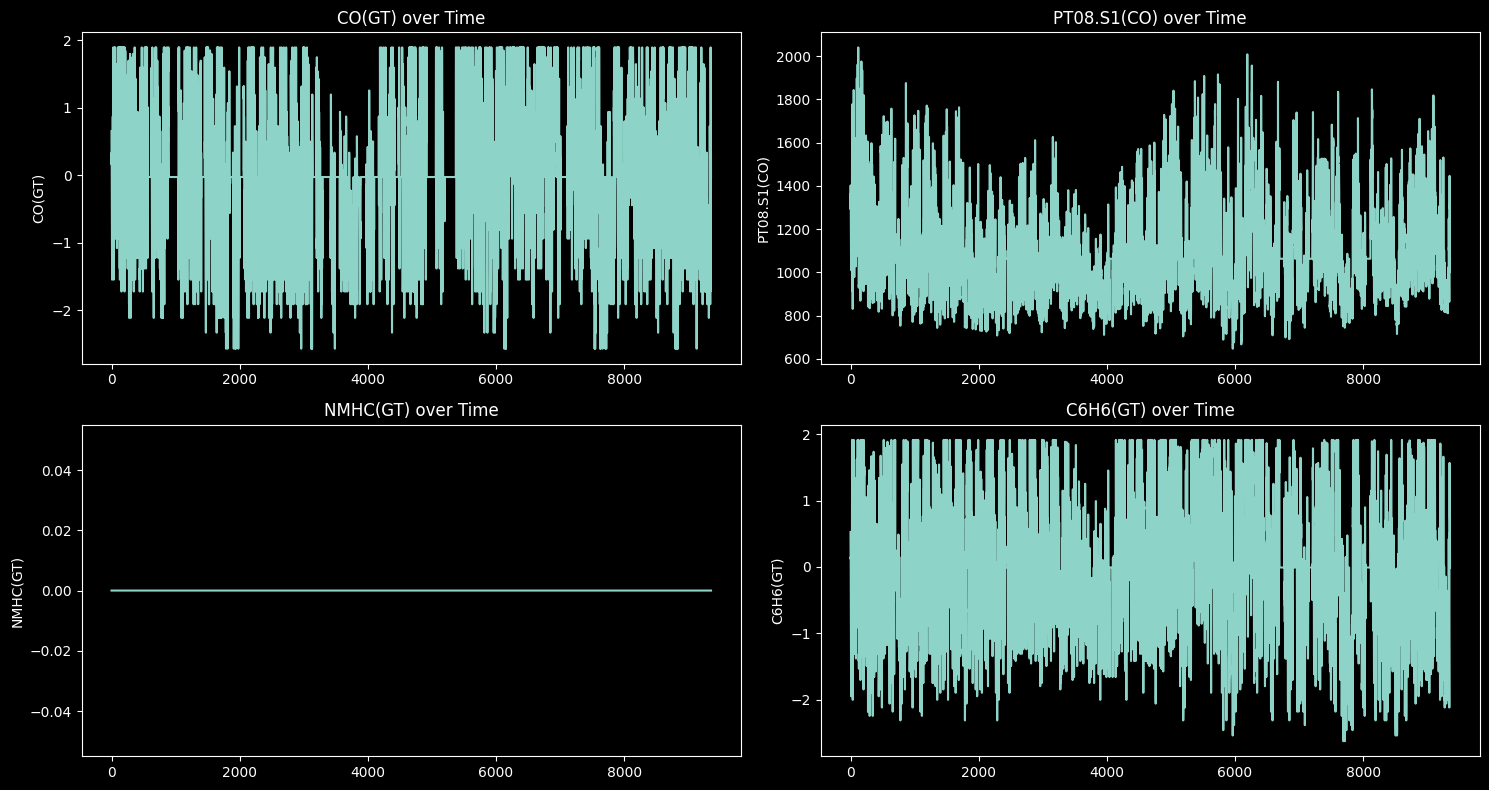

In [546]:
# Plot first 4 columns over time
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
numeric_cols = df.select_dtypes(include=[np.number]).columns[:4]

for i, col in enumerate(numeric_cols):
    ax = axes[i//2, i%2]
    ax.plot(df[col])
    ax.set_title(f'{col} over Time')
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

In [547]:
def data_cleanliness_report(df):
    print("📊 DATA CLEANLINESS REPORT")
    print("=" * 50)
    
    # Missing values
    missing = df.isnull().sum().sum()
    print(f"Missing values: {missing} ✅" if missing == 0 else f"Missing values: {missing} ⚠️")
    
    # Skewness
    skewness = df.select_dtypes(include=[np.number]).skew()
    high_skew = sum(abs(skewness) > 1)
    print(f"Highly skewed columns: {high_skew}")
    
    # Data types
    print(f"Columns: {len(df.columns)}")
    print(f"Rows: {len(df)}")
    
    return {
        'missing': missing,
        'high_skew': high_skew
    }

# Usage
report = data_cleanliness_report(df)

📊 DATA CLEANLINESS REPORT
Missing values: 9358 ⚠️
Highly skewed columns: 0
Columns: 15
Rows: 9358


In [548]:
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,AH_log,Datetime
0,0.653136,1360.0,0.0,0.528046,1046.0,-0.141880,1.005428,113.0,1692.0,1268.0,13.6,48.9,0.7578,0.945111,NaT
1,0.159487,1292.0,0.0,0.182348,955.0,-0.744064,1.415568,92.0,1559.0,972.0,13.3,47.7,0.7255,0.932479,NaT
2,0.334327,1402.0,0.0,0.121075,939.0,-0.450838,1.300670,114.0,1555.0,1074.0,11.9,54.0,0.7502,0.942153,NaT
3,0.334327,1376.0,0.0,0.151949,948.0,-0.093742,1.134030,122.0,1584.0,1203.0,11.0,60.0,0.7867,0.956280,NaT
4,-0.228567,1272.0,0.0,-0.313252,836.0,-0.450838,1.518185,116.0,1490.0,1110.0,11.2,59.6,0.7888,0.957087,NaT


In [ ]:
# I TRIED SO MUCH ON THIS DATASET SPENT 2 DAYS IDK WHAT'S WRONG WITH IT ANYMORE